In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

a) Führen Sie für diesen Datensatz eine explorative Analyse wie in der Vorlesung gezeigt mithilfe eines IPython-Notebooks und den Paketen Pandas und Numpy durch.

In [4]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
np.shape(boston)

(506, 14)

In [7]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TGT'],
      dtype='object')

In [8]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

Daten Aufbereiten

In [10]:
# Nach leerzeilen suchen
boston.isna().any()

# Alle Zeilen entfernen mit NaN Values
boston = boston.dropna()
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
# Check if there are any duplicates
boston.duplicated().any()

False

Explorative Statistik

In [12]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


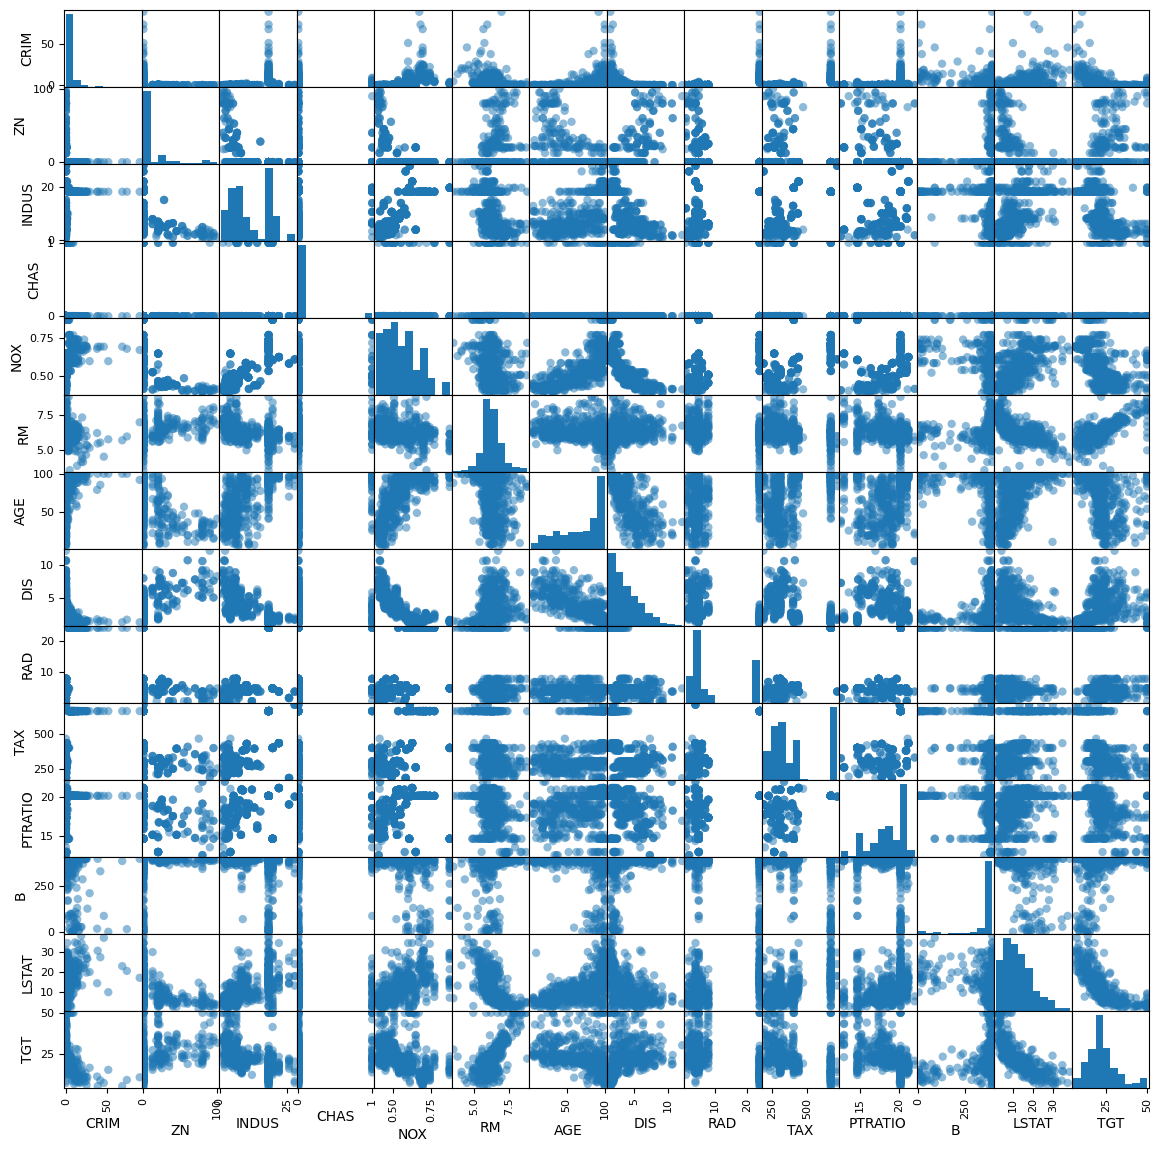

In [13]:
pd.plotting.scatter_matrix(boston, figsize=(14,14), marker='o');


Analyse von Untermengen

In [17]:
boston['RM']

# Which Houses have more than 10 rooms?

boston['RM'] > 10

# Is there any ?

(boston['RM'] > 10).any()

False

In [22]:
# Does every house have more than 3 rooms?

(boston['RM'] > 3).all()

True

In [47]:
# Check uniqueness 
# 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        # 'LSTAT','TGT'
boston['AGE'].unique()

array([ 65.2,  78.9,  61.1,  45.8,  54.2,  58.7,  66.6,  96.1, 100. ,
        85.9,  94.3,  82.9,  39. ,  61.8,  84.5,  56.5,  29.3,  81.7,
        36.6,  69.5,  98.1,  89.2,  91.7,  94.1,  85.7,  90.3,  88.8,
        94.4,  87.3,  82. ,  95. ,  96.9,  68.2,  61.4,  41.5,  30.2,
        21.8,  15.8,   2.9,   6.6,   6.5,  40. ,  33.8,  33.3,  85.5,
        95.3,  62. ,  45.7,  63. ,  21.1,  21.4,  47.6,  21.9,  35.7,
        40.5,  29.2,  47.2,  66.2,  93.4,  67.8,  43.4,  59.5,  17.8,
        31.1,  36.8,  33. ,  17.5,   7.8,   6.2,   6. ,  45. ,  74.5,
        53.7,  33.5,  70.4,  32.2,  46.7,  48. ,  56.1,  45.1,  56.8,
        86.3,  63.1,  66.1,  73.9,  53.6,  28.9,  77.3,  57.8,  69.6,
        76. ,  36.9,  62.5,  79.9,  71.3,  85.4,  87.4,  90. ,  96.7,
        91.9,  85.2,  97.1,  91.2,  54.4,  81.6,  92.9,  95.4,  84.2,
        88.2,  72.5,  82.6,  73.1,  69.7,  84.1,  97. ,  95.8,  88.4,
        95.6,  96. ,  98.8,  94.7,  98.9,  97.7,  97.9,  98.4,  98.2,
        93.5,  93.6,

In [29]:
boston['RM'].value_counts()

RM
5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
        ..
5.859    1
6.416    1
5.572    1
5.880    1
6.976    1
Name: count, Length: 446, dtype: int64

In [40]:
pd.crosstab(boston['CHAS'], boston['RM'])

RM,3.561,3.863,4.138,4.368,4.519,4.628,4.652,4.880,4.903,4.906,...,8.247,8.259,8.266,8.297,8.337,8.375,8.398,8.704,8.725,8.780
CHAS,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


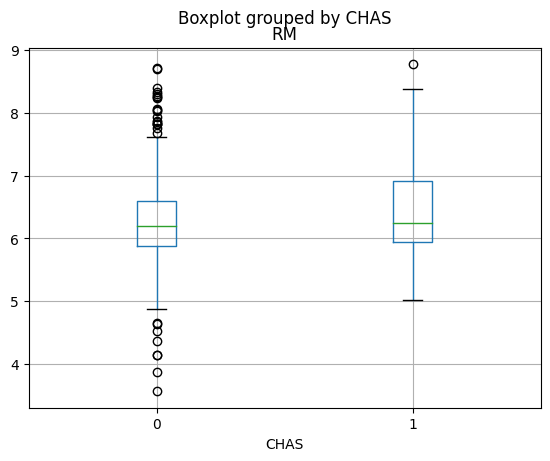

In [39]:
pd.DataFrame.boxplot(boston, column='RM', by='CHAS');

b) Beantworten Sie anhand der Darstellung der Streumatrix folgende Fragen: 
- Welche der Variablen sind kategorisch? 
- Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum? 
- Welche dieser Variablen sind miteinander korreliert? 
- Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)

Welche der Variablen sind kategorisch?:
- CHAS

Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum?
- Räume 
- Tax

Welche dieser Variablen sind miteinander korreliert? Paar Beispiele
- LSTAT - TGT
- DIS - TGT
- RM - TGT
- NOX - LSTAT
- RM - LSTAT

Welche sind daher Kandidaten, die man evtl. weglassen könnte?
- Variablen, die keine Aussage haben und mit nichts korrelieren


In [48]:
pip install version-information

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for version-information: filename=version_information-1.0.4-py3-none-any.whl size=3902 sha256=b367dd5934139cffc7b180595dac06191b60b7c80a7270ad7d24e8dc91e69d2e
  Stored in directory: c:\users\marco\appdata\local\pip\cache\wheels\7f\ee\1c\4cea6bb39c5811e3856867ee7fdcc80fe4fec1938aaf9a6f40
Successfully built version-information
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: C:\Users\marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [49]:
%load_ext version_information

In [50]:
%version_information numpy, pandas

Software versions
Python 3.8.10 64bit [MSC v.1928 64 bit (AMD64)]
IPython 8.12.0
OS Windows 10 10.0.19045 SP0
numpy 1.22.4
pandas 2.0.0
Tue Oct 17 16:31:08 2023 Mitteleuropäische Sommerzeit